In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)

In [14]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
abalone.shape

(4177, 9)

In [16]:
abalone.columns = ["Sex", "Length", "Diameter","Height",
     "Whole weight", "Shucked weight", "Viscera weight", "Shell weight","Rings"]

In [17]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [18]:
abalone = abalone.drop("Sex", axis=1)

In [19]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


## What distribution of dependent variable look like?

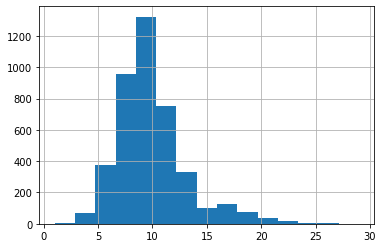

In [20]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show()

## Explore correlation between Ring and independent variable

<AxesSubplot:>

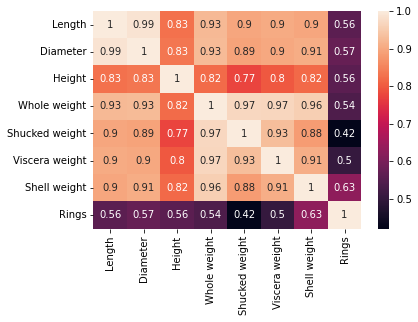

In [23]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]
sns.heatmap(correlation_matrix,annot = True)

<AxesSubplot:>

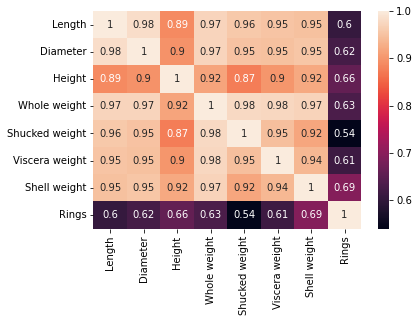

In [24]:
correlation_matrix = abalone.corr(method='spearman')
correlation_matrix["Rings"]
sns.heatmap(correlation_matrix,annot = True)

## Define y and X

In [29]:
X = abalone.drop("Rings", axis=1)
y = abalone["Rings"]

In [30]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


## Create train and test data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=864)

## Create KNN model with k=3

In [33]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [34]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

## Compute performance metric

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse)
print(f'RMSE of Training set = {rmse_train}')

RMSE of Training set = 1.6541553436079885


In [38]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse_test = sqrt(mse)
rmse_test
print(f'RMSE of Test set = {rmse_test}')

RMSE of Test set = 2.349963520705021


<AxesSubplot:>

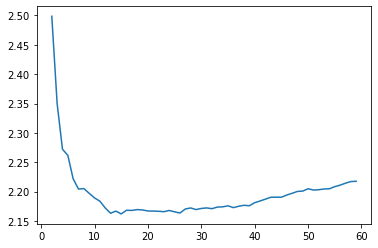

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error = {}
for i in range(2,60):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    test_preds = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, test_preds)
    rmse_test = sqrt(mse)
    error[i] = rmse_test
sns.lineplot(x = error.keys(),y=error.values())
    


In [56]:
print(min(error.values()))
error[15]

2.1621229910576405


2.1621229910576405

## Predicting ring for new data point

In [57]:
new_data_point = np.array([[
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208
]])

In [59]:
knn_model = KNeighborsRegressor(n_neighbors=15)
knn_model.fit(X_train, y_train)
knn_model.predict(new_data_point)

/Users/euer/Documents/GitHub/ML_template/virtualenv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([11.])

## Search for more appropriate k

In [52]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [53]:
gridsearch.best_params_

{'n_neighbors': 15}

## Let build KNN model with best k and also evaluate performance

In [ ]:
This video is recorded by Marit Asavamahakul 64605091